<a href="https://colab.research.google.com/github/rizkycahyono97/BMKG-API-App/blob/main/analicys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Persiapan Data
# Sumber Dataset:
# Dataset yang digunakan berasal dari UCI Machine Learning Repository.
# Dataset terdiri dari dua file: student-por.csv (data siswa di kelas Portugis) dan student-mat.csv (data siswa di kelas Matematika).

# Load dataset
por = pd.read_csv("student-por.csv", sep=";")
mat = pd.read_csv("student-mat.csv", sep=";")

In [ ]:
# Gabungkan dataset
df = pd.concat([por, mat], ignore_index=True)


In [ ]:
# Cek missing values
df.fillna(method='ffill', inplace=True)


<ipython-input-6-247524c172f7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Encoding data kategori
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Rekayasa fitur: Menggabungkan G1 dan G2 sebagai prediktor tambahan
df['G1_G2_avg'] = (df['G1'] + df['G2']) / 2


In [ ]:
# Pilih fitur dan target
X = df.drop(columns=['G3'])  # G3 sebagai target (nilai akhir siswa)
y = df['G3']

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Metodologi
# Pemilihan Algoritma:
# Random Forest dipilih karena kemampuannya dalam menangani dataset dengan fitur campuran dan mencegah overfitting.
# Algoritma ini juga mampu memberikan interpretasi terhadap fitur yang paling berpengaruh.

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Model training dengan tuning hyperparameter
model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [ ]:
# Evaluasi Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')


RMSE: 1.41
R2 Score: 0.86


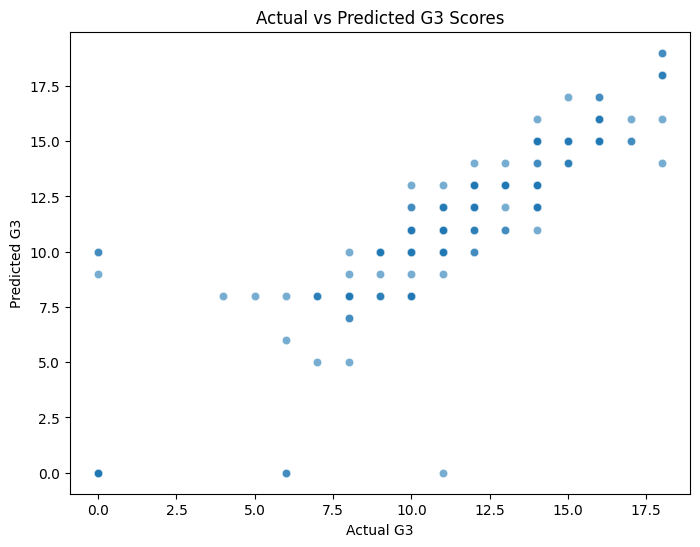

In [ ]:
# Visualisasi Hasil
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3 Scores')
plt.show()

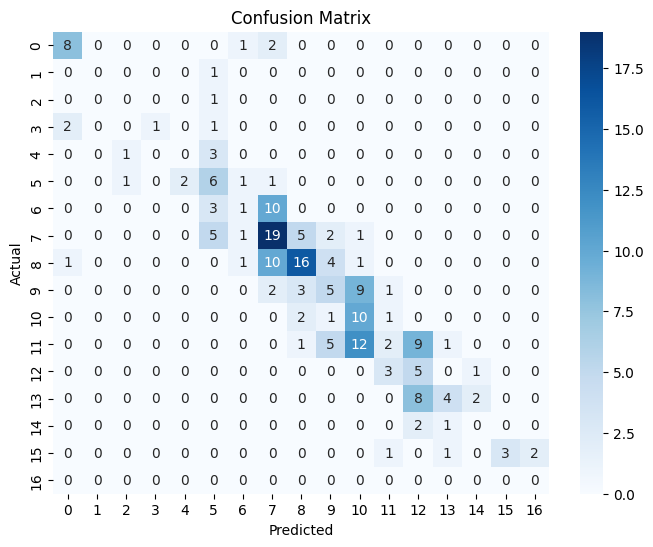

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, np.round(y_pred))), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()